In [1]:

import numpy as np
import seaborn as sns
import pandas as pd
import itertools 
import csv
import collections
import matplotlib.pyplot as plt

sns.set_context("paper")
%matplotlib inline

RES_DIR = "DATA/"

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load train data (skips the content column)
def load_train_data():
    categories = ['cooking', 'robotics', 'travel', 'crypto', 'diy', 'biology']
    train_data = []
    for cat in categories:
        data = pd.read_csv("{}{}.csv".format(RES_DIR, cat), usecols=['id', 'title', 'tags'])
        data['category'] = cat
        train_data.append(data)
    
    return pd.concat(train_data)

In [3]:
train_data = load_train_data()
train_data.head()

,id,title,tags,category
0,1,How can I get chewy chocolate chip cookies?,baking cookies texture,cooking
1,2,How should I cook bacon in an oven?,oven cooking-time bacon,cooking
2,3,What is the difference between white and brown...,eggs,cooking
3,4,What is the difference between baking soda and...,substitutions please-remove-this-tag baking-so...,cooking
4,5,"In a tomato sauce recipe, how can I cut the ac...",sauce pasta tomatoes italian-cuisine,cooking


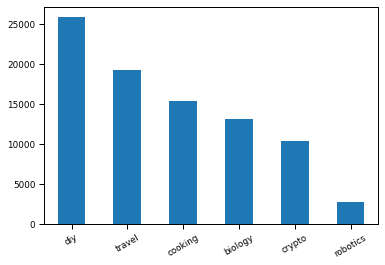

In [4]:
# Distribution of questions by category
ax = train_data['category'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=30)
plt.show()

In [5]:
# Summary about tags
tag_lists = [t.strip().split() for t in train_data['tags'].values]
tag_lists2 = [t.strip().split() for t in train_data['title'].values]
all_tags = list(itertools.chain(*tag_lists,*tag_lists2))
tag_list_size = np.array([len(x) for x in tag_lists])
print("""The corpus is composed by {} questions. Overall {} tags have been used, of which {} unique ones. 
Average number of tags per question {:.2f} (min={}, max={}, std={:.2f})""".format(
    len(train_data),
    len(all_tags), len(set(all_tags)),
    tag_list_size.mean(), 
    min(tag_list_size), max(tag_list_size),
    tag_list_size.std()))

The corpus is composed by 87000 questions. Overall 1049037 tags have been used, of which 76043 unique ones. 
Average number of tags per question 2.59 (min=1, max=5, std=1.20)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


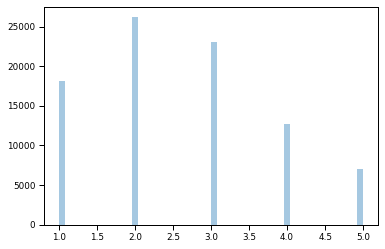

In [6]:
# Distribution of number of tags per question
sns.distplot(tag_list_size, kde=False)

In [7]:
# Utility function to return top occuring tags in the passed df
def get_top_tags(df, n=None):
    itag_lists = [t.strip().split() for t in df['tags'].values]
    itag_lists2 = [t.strip().split() for t in df['title'].values]
    tags = list(itertools.chain(*itag_lists,*itag_lists2))
    top_tags = collections.Counter(list(tags)).most_common(n)
    tags, count = zip(*top_tags)
    return tags, count
# Utility function to return top occuring tags in the passed df

In [8]:
# Created DataFrame indexed on tags
tags_df = pd.DataFrame(index=set(itertools.chain(*tag_lists,*tag_lists2)))
# For each category create a column and update the flag to tag count
for i, (name, group) in enumerate(train_data.groupby('category')):
    tags_df[name] = 0
    tmp_index, count = get_top_tags(group)
    tmp = pd.Series(count, index=tmp_index)
    tags_df[name].update(tmp)
# Number of categories for which a tag appeared at least 1 time
tags_df['categories_appears'] = tags_df.apply(lambda x: x.astype(bool).sum(), axis=1)
tags_df['categories_appears'].value_counts()

1    61906
2     7559
3     3024
4     1614
5     1042
6      898
Name: categories_appears, dtype: int64

In [9]:
#import the test data
test = pd.read_csv("DATA/test.csv")
test.head()

,id,title,content
0,1,What is spin as it relates to subatomic partic...,<p>I often hear about subatomic particles havi...
1,2,What is your simplest explanation of the strin...,<p>How would you explain string theory to non ...
2,3,"Lie theory, Representations and particle physics",<p>This is a question that has been posted at ...
3,7,Will Determinism be ever possible?,<p>What are the main problems that we need to ...
4,9,Hamilton's Principle,<p>Hamilton's principle states that a dynamic ...


In [10]:
# viewing the table of tags
A=tags_df
A

,biology,cooking,crypto,diy,robotics,travel,categories_appears
distinguishability?,0,0,1,0,0,0,1
accepted,1,1,2,0,1,20,5
Bright,1,0,0,0,0,0,1
author,0,2,2,0,0,0,2
Beerlao,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...
"""sideways""?",0,0,0,1,0,0,1
Stimulation,1,0,0,0,0,0,1
restlestness?,1,0,0,0,0,0,1
I2OSP,0,0,1,0,0,0,1


In [11]:
#Solving the question with a Singular Value Decomposition, 
#this is the core function

In [12]:
from numpy.linalg import inv
U,s,V=np.linalg.svd(A,full_matrices=False)
# reconstruct
S=np.diag(s)

iS=inv(S)
US=np.dot(U,iS)
US
# A fill up with US matrix
US_df=pd.DataFrame(data=US, index=tags_df.index, columns=tags_df.columns)
# with this simple math i know all the relations between all the tags and the documents
# 

In [13]:
#learn how to use dataframes...  and yes the algorithm knows extreme tourism antarctica has something to do with travel...
df1=US_df['extreme-tourism':'extreme-tourism':]
df2=US_df['antarctica':'antarctica':]
frames = [df1,df2]
Qtemp=pd.concat(frames).sum()
np.dot(Qtemp,V)/np.dot(np.abs(Qtemp),np.abs(V))

array([-0.20538947, -0.75946705, -0.32231609, -0.27091374, -0.98460849,
        1.        ,  0.9984604 ])

In [14]:
columns = ['biology','cooking','crypto','diy','robotics','travel']
#,'categories_appears']
data = {'biology': [0],'cooking': [0],'crypto': [0],'diy': [0],'robotics': [0],'travel': [0],'categories_appears': [0]}
newDF = pd.DataFrame(data, columns=columns,index = ['blanco'])
#print(newDF)
for xya in range(0,8926):
    temptxt = test['title'][xya] + test['content'][xya]
    tempspl = temptxt.strip().split() 
    Qtemp=newDF
    for sword in tempspl:
        if sword in US_df.index:
            #print(US_df.loc[sword:sword,:])
            Qtemp=Qtemp.append(US_df.loc[sword:sword,:])
            #print(Qtemp)
    simila=np.dot(Qtemp.sum(),V)/np.dot(np.abs(Qtemp.sum()),np.abs(V))
    tempprnt=''
    for xyb in range(0,5):
        if simila[xyb]>0.89 or simila[xyb]==np.amax(simila[0:5]):
            tempprnt+=columns[xyb]+' '
    
    print(test['id'][xya],',',tempprnt)

    
    
 

1 , cooking robotics 
2 , biology 
3 , crypto 
7 , biology robotics 
9 , robotics 
13 , cooking 
15 , biology 
17 , biology 
19 , cooking crypto robotics 
21 , biology 
24 , biology 
26 , robotics 
27 , biology robotics 
29 , biology robotics 
31 , biology robotics 
32 , biology 
35 , cooking 
37 , biology robotics 
41 , biology robotics 
49 , robotics 
52 , biology robotics 
62 , biology 
68 , biology robotics 
71 , biology 
72 , biology 
73 , biology 
75 , robotics 
78 , cooking 
79 , biology 
83 , biology robotics 
85 , biology robotics 
89 , biology robotics 
90 , biology 
93 , biology robotics 
94 , biology robotics 
95 , biology robotics 
98 , biology robotics 
100 , robotics 
101 , biology robotics 
102 , biology robotics 
111 , robotics 
115 , robotics 
122 , biology 
123 , robotics 
127 , biology 
129 , biology 
134 , robotics 
139 , biology 
141 , robotics 
142 , biology 
145 , biology robotics 
147 , robotics 
156 , biology 
159 , biology 
160 , robotics 
166 , biology 
167 

1756 , biology robotics 
1763 , biology robotics 
1766 , biology 
1768 , biology 
1772 , biology 
1775 , biology 
1779 , cooking robotics 
1787 , biology 
1789 , biology 
1791 , biology 
1796 , robotics 
1797 , biology 
1799 , biology robotics 
1801 , biology 
1813 , diy 
1816 , biology 
1819 , robotics 
1822 , biology 
1836 , biology 
1839 , robotics 
1843 , biology 
1845 , biology robotics 
1846 , robotics 
1847 , biology robotics 
1852 , biology 
1858 , biology 
1862 , biology robotics 
1869 , biology robotics 
1873 , cooking 
1875 , biology 
1876 , biology robotics 
1888 , biology robotics 
1894 , robotics 
1898 , biology 
1901 , biology robotics 
1906 , biology 
1907 , biology robotics 
1908 , biology 
1909 , robotics 
1915 , biology 
1916 , biology robotics 
1918 , biology 
1927 , biology robotics 
1939 , robotics 
1942 , biology 
1943 , biology robotics 
1949 , biology 
1952 , biology robotics 
1957 , biology robotics 
1961 , robotics 
1968 , biology robotics 
1970 , biology rob

3333 , biology robotics 
3334 , robotics 
3342 , cooking robotics 
3343 , biology 
3344 , robotics 
3346 , biology robotics 
3349 , robotics 
3352 , biology 
3355 , biology 
3357 , biology 
3359 , biology 
3360 , biology 
3362 , biology robotics 
3372 , robotics 
3385 , biology robotics 
3390 , robotics 
3394 , biology 
3395 , diy 
3401 , biology robotics 
3402 , biology robotics 
3411 , robotics 
3412 , biology 
3432 , robotics 
3436 , robotics 
3442 , biology 
3443 , biology robotics 
3444 , biology robotics 
3445 , robotics 
3448 , biology 
3452 , biology robotics 
3467 , biology 
3468 , biology robotics 
3477 , biology robotics 
3486 , biology 
3488 , biology 
3489 , cooking 
3495 , biology 
3496 , biology 
3497 , biology robotics 
3498 , biology 
3500 , biology crypto robotics 
3503 , biology robotics 
3505 , biology robotics 
3518 , biology 
3521 , robotics 
3526 , biology robotics 
3527 , biology 
3531 , biology robotics 
3534 , biology 
3541 , biology robotics 
3543 , biology 


5118 , biology 
5124 , robotics 
5128 , robotics 
5132 , biology robotics 
5134 , biology robotics 
5141 , biology 
5144 , biology 
5147 , biology robotics 
5149 , biology 
5150 , biology 
5156 , biology 
5158 , crypto 
5166 , biology 
5170 , cooking 
5180 , biology robotics 
5181 , biology 
5185 , biology robotics 
5188 , biology robotics 
5190 , biology robotics 
5192 , biology 
5194 , biology 
5195 , biology robotics 
5202 , biology robotics 
5207 , robotics 
5215 , biology robotics 
5217 , robotics 
5224 , robotics 
5226 , crypto robotics 
5228 , biology robotics 
5232 , biology robotics 
5235 , biology robotics 
5236 , biology 
5243 , crypto robotics 
5246 , biology 
5252 , biology robotics 
5262 , biology robotics 
5265 , biology 
5266 , biology 
5268 , biology robotics 
5270 , biology robotics 
5273 , biology 
5277 , biology robotics 
5282 , biology robotics 
5283 , biology 
5291 , biology 
5296 , biology 
5299 , biology 
5300 , biology robotics 
5304 , biology robotics 
5307 , 

6742 , biology 
6745 , biology 
6748 , biology robotics 
6750 , biology 
6754 , biology robotics 
6762 , biology robotics 
6768 , biology 
6769 , robotics 
6771 , biology 
6775 , biology robotics 
6776 , biology 
6777 , robotics 
6778 , biology robotics 
6782 , biology robotics 
6783 , biology 
6784 , cooking 
6786 , robotics 
6787 , robotics 
6789 , biology robotics 
6792 , biology robotics 
6798 , biology 
6811 , biology 
6813 , biology 
6816 , robotics 
6817 , biology 
6820 , robotics 
6822 , biology 
6824 , biology cooking robotics 
6827 , biology robotics 
6829 , biology 
6835 , biology 
6839 , biology 
6844 , biology robotics 
6855 , biology 
6856 , biology 
6860 , robotics 
6863 , biology 
6867 , biology 
6869 , biology robotics 
6872 , biology robotics 
6875 , biology 
6877 , biology 
6887 , biology 
6890 , biology 
6893 , biology robotics 
6897 , biology 
6898 , robotics 
6899 , biology 
6904 , biology 
6906 , biology 
6907 , biology robotics 
6908 , biology 
6910 , biology 
6

8289 , biology robotics 
8291 , biology robotics 
8294 , biology robotics 
8295 , biology robotics 
8301 , biology 
8303 , biology 
8307 , biology robotics 
8310 , biology robotics 
8314 , biology robotics 
8319 , biology robotics 
8325 , biology robotics 
8327 , robotics 
8331 , robotics 
8340 , biology robotics 
8341 , biology diy 
8343 , biology robotics 
8347 , biology crypto robotics 
8352 , biology 
8355 , biology 
8356 , biology robotics 
8358 , biology robotics 
8359 , biology robotics 
8365 , robotics 
8367 , biology 
8373 , biology 
8379 , biology 
8381 , biology 
8384 , biology robotics 
8387 , biology 
8390 , biology 
8391 , biology robotics 
8392 , robotics 
8396 , biology robotics 
8400 , biology 
8402 , biology robotics 
8407 , robotics 
8408 , biology 
8420 , biology 
8425 , biology robotics 
8426 , biology robotics 
8428 , biology 
8431 , robotics 
8432 , biology 
8433 , biology robotics 
8434 , biology 
8436 , biology robotics 
8441 , robotics 
8452 , biology robotics

9696 , biology 
9698 , biology 
9702 , biology robotics 
9704 , biology 
9705 , biology robotics 
9706 , biology 
9708 , cooking 
9715 , robotics 
9716 , biology robotics 
9718 , robotics 
9720 , biology crypto robotics 
9727 , biology robotics 
9729 , robotics 
9730 , robotics 
9731 , biology 
9732 , biology robotics 
9745 , biology robotics 
9748 , biology robotics 
9751 , biology 
9754 , biology 
9756 , biology 
9765 , biology 
9772 , robotics 
9773 , robotics 
9775 , biology robotics 
9776 , biology robotics 
9781 , biology robotics 
9784 , biology robotics 
9786 , biology robotics 
9787 , cooking robotics 
9788 , biology robotics 
9791 , diy robotics 
9792 , cooking 
9795 , biology 
9799 , diy 
9800 , biology 
9801 , robotics 
9805 , cooking robotics 
9814 , biology 
9815 , biology 
9818 , biology 
9819 , biology 
9822 , biology robotics 
9830 , biology robotics 
9835 , biology 
9836 , biology 
9837 , biology robotics 
9840 , biology robotics 
9842 , biology robotics 
9846 , biolo

10990 , biology robotics 
10991 , biology robotics 
10994 , biology robotics 
10998 , biology 
11000 , biology robotics 
11003 , cooking 
11005 , robotics 
11007 , biology crypto robotics 
11014 , biology 
11017 , biology robotics 
11021 , biology robotics 
11031 , robotics 
11037 , biology robotics 
11039 , biology robotics 
11041 , biology 
11042 , biology 
11049 , biology robotics 
11050 , robotics 
11054 , biology robotics 
11057 , biology 
11058 , robotics 
11061 , biology 
11063 , robotics 
11064 , biology crypto 
11065 , biology 
11067 , biology 
11075 , biology robotics 
11077 , biology 
11078 , biology robotics 
11081 , biology robotics 
11087 , biology cooking 
11092 , biology robotics 
11096 , biology 
11098 , biology robotics 
11104 , robotics 
11105 , robotics 
11107 , biology robotics 
11112 , biology robotics 
11115 , biology robotics 
11117 , biology 
11120 , biology 
11126 , diy 
11128 , biology 
11129 , cooking 
11132 , biology 
11136 , biology 
11137 , biology 
11138

12297 , biology robotics 
12301 , biology robotics 
12305 , biology robotics 
12307 , biology 
12309 , biology 
12313 , biology robotics 
12314 , biology 
12315 , robotics 
12320 , robotics 
12321 , crypto robotics 
12322 , robotics 
12324 , biology 
12330 , biology robotics 
12331 , biology 
12333 , biology robotics 
12334 , biology robotics 
12341 , biology 
12344 , robotics 
12346 , biology robotics 
12348 , biology robotics 
12353 , biology robotics 
12358 , biology 
12359 , biology robotics 
12361 , biology 
12365 , robotics 
12369 , biology robotics 
12373 , biology 
12377 , biology 
12383 , biology 
12384 , biology 
12385 , biology 
12386 , biology 
12404 , biology robotics 
12408 , biology robotics 
12417 , biology robotics 
12418 , biology 
12420 , biology robotics 
12421 , biology 
12422 , biology 
12431 , biology 
12435 , biology robotics 
12436 , biology robotics 
12440 , robotics 
12444 , robotics 
12450 , biology 
12456 , robotics 
12457 , biology robotics 
12460 , cookin

13744 , biology 
13752 , robotics 
13756 , biology 
13757 , biology 
13767 , biology 
13772 , biology 
13776 , biology 
13777 , biology 
13783 , biology robotics 
13787 , biology robotics 
13790 , robotics 
13793 , biology robotics 
13795 , biology 
13797 , robotics 
13804 , biology robotics 
13806 , biology 
13808 , robotics 
13809 , biology 
13810 , robotics 
13814 , biology robotics 
13816 , robotics 
13822 , robotics 
13826 , biology 
13828 , biology robotics 
13829 , biology 
13832 , biology robotics 
13834 , biology 
13841 , biology 
13842 , biology robotics 
13843 , biology robotics 
13845 , biology 
13848 , biology robotics 
13851 , robotics 
13855 , biology 
13860 , biology 
13861 , robotics 
13864 , biology 
13869 , robotics 
13870 , biology robotics 
13871 , biology 
13878 , biology robotics 
13883 , biology 
13884 , biology robotics 
13896 , biology robotics 
13899 , biology 
13901 , biology 
13904 , biology robotics 
13907 , biology robotics 
13909 , biology 
13911 , biolo

15034 , robotics 
15037 , biology 
15038 , biology 
15040 , biology robotics 
15046 , biology 
15050 , biology 
15051 , biology 
15052 , robotics 
15053 , biology 
15055 , biology 
15056 , biology 
15061 , biology 
15063 , crypto 
15067 , cooking robotics 
15068 , biology robotics 
15071 , biology 
15073 , biology 
15075 , biology 
15081 , robotics 
15082 , biology 
15083 , biology 
15085 , cooking 
15088 , robotics 
15089 , robotics 
15090 , biology 
15093 , biology 
15097 , biology robotics 
15098 , biology robotics 
15102 , robotics 
15107 , biology 
15108 , biology robotics 
15109 , biology 
15120 , biology 
15121 , robotics 
15122 , biology robotics 
15127 , biology robotics 
15129 , biology crypto robotics 
15132 , biology robotics 
15134 , biology robotics 
15135 , biology 
15138 , biology robotics 
15142 , robotics 
15147 , biology 
15148 , robotics 
15155 , biology 
15156 , biology 
15157 , robotics 
15161 , biology robotics 
15162 , biology 
15165 , biology 
15169 , biology 


16279 , biology robotics 
16281 , biology robotics 
16282 , robotics 
16286 , robotics 
16290 , biology robotics 
16296 , biology robotics 
16297 , biology 
16299 , biology 
16300 , biology 
16305 , robotics 
16306 , biology 
16307 , biology 
16310 , biology robotics 
16314 , biology robotics 
16322 , robotics 
16323 , biology robotics 
16324 , biology robotics 
16326 , biology robotics 
16329 , biology 
16330 , biology 
16332 , cooking robotics 
16333 , biology robotics 
16334 , cooking 
16339 , biology robotics 
16340 , biology robotics 
16341 , biology robotics 
16343 , biology robotics 
16349 , robotics 
16351 , robotics 
16353 , biology 
16354 , biology 
16356 , biology 
16357 , biology 
16367 , biology 
16368 , biology robotics 
16378 , biology 
16382 , biology 
16385 , biology robotics 
16386 , biology robotics 
16387 , biology robotics 
16389 , biology 
16390 , biology robotics 
16391 , biology 
16400 , biology 
16403 , robotics 
16405 , biology robotics 
16411 , biology roboti

17508 , biology crypto robotics 
17509 , biology robotics 
17513 , biology 
17516 , biology robotics 
17517 , biology 
17519 , biology 
17521 , biology 
17524 , biology robotics 
17525 , biology 
17527 , biology robotics 
17528 , biology robotics 
17531 , robotics 
17532 , biology robotics 
17534 , biology crypto robotics 
17538 , robotics 
17551 , biology robotics 
17552 , biology 
17554 , biology 
17556 , biology 
17566 , biology robotics 
17569 , biology 
17573 , biology robotics 
17574 , biology robotics 
17575 , robotics 
17576 , biology robotics 
17587 , biology robotics 
17588 , biology 
17589 , biology robotics 
17591 , biology robotics 
17592 , robotics 
17593 , biology 
17594 , biology 
17598 , biology robotics 
17601 , biology robotics 
17603 , biology cooking crypto 
17604 , biology robotics 
17616 , biology 
17621 , biology robotics 
17622 , biology 
17624 , biology 
17625 , biology 
17626 , biology robotics 
17628 , biology robotics 
17632 , robotics 
17638 , biology cryp

18822 , biology 
18823 , robotics 
18835 , biology 
18840 , biology 
18844 , biology robotics 
18847 , biology 
18851 , crypto 
18853 , robotics 
18867 , diy 
18874 , biology 
18881 , biology 
18882 , biology 
18887 , biology robotics 
18889 , biology 
18900 , biology robotics 
18901 , robotics 
18904 , cooking 
18908 , biology robotics 
18909 , biology robotics 
18912 , cooking 
18913 , biology 
18915 , biology robotics 
18917 , biology 
18920 , crypto diy 
18922 , robotics 
18923 , biology 
18925 , biology 
18941 , biology 
18942 , biology robotics 
18945 , biology 
18950 , biology robotics 
18952 , biology robotics 
18954 , biology 
18958 , biology 
18959 , biology 
18962 , biology 
18964 , cooking 
18966 , cooking robotics 
18969 , robotics 
18974 , robotics 
18980 , robotics 
18981 , biology robotics 
18985 , biology robotics 
18997 , biology 
18998 , robotics 
19000 , biology 
19001 , biology robotics 
19008 , robotics 
19011 , biology robotics 
19012 , biology cooking robotics 


20149 , biology robotics 
20155 , biology 
20157 , biology 
20165 , robotics 
20171 , biology robotics 
20173 , biology 
20176 , biology robotics 
20177 , biology 
20182 , robotics 
20186 , biology 
20187 , robotics 
20188 , biology robotics 
20189 , biology 
20190 , biology 
20192 , biology 
20200 , robotics 
20201 , cooking robotics 
20207 , biology robotics 
20212 , biology robotics 
20213 , biology robotics 
20219 , biology 
20222 , biology 
20233 , robotics 
20234 , robotics 
20237 , biology 
20238 , biology 
20241 , robotics 
20242 , biology 
20250 , robotics 
20251 , robotics 
20254 , biology robotics 
20258 , biology robotics 
20259 , biology 
20260 , biology 
20267 , robotics 
20272 , biology robotics 
20273 , biology robotics 
20275 , robotics 
20277 , robotics 
20282 , robotics 
20284 , biology robotics 
20287 , biology 
20289 , biology 
20291 , biology robotics 
20298 , biology 
20301 , biology robotics 
20303 , biology robotics 
20304 , biology 
20306 , biology robotics 
2

21354 , biology 
21360 , biology robotics 
21365 , biology robotics 
21370 , biology 
21372 , robotics 
21373 , biology robotics 
21376 , biology crypto robotics 
21378 , biology robotics 
21379 , robotics 
21384 , robotics 
21388 , biology robotics 
21392 , biology 
21395 , biology 
21404 , robotics 
21405 , biology robotics 
21407 , robotics 
21408 , crypto robotics 
21415 , biology robotics 
21417 , robotics 
21418 , biology robotics 
21419 , biology 
21420 , biology 
21424 , biology robotics 
21425 , biology robotics 
21434 , biology cooking crypto 
21437 , robotics 
21444 , biology robotics 
21446 , biology robotics 
21448 , biology robotics 
21449 , robotics 
21452 , biology 
21455 , biology 
21456 , biology robotics 
21458 , robotics 
21465 , biology 
21468 , biology robotics 
21474 , biology 
21477 , biology 
21482 , biology robotics 
21483 , robotics 
21484 , cooking robotics 
21485 , biology 
21486 , biology 
21487 , biology 
21488 , biology robotics 
21491 , robotics 
21506 

22686 , biology 
22691 , biology 
22693 , biology robotics 
22696 , biology robotics 
22700 , biology robotics 
22713 , biology 
22717 , biology 
22720 , biology 
22722 , biology robotics 
22725 , robotics 
22730 , biology 
22733 , biology robotics 
22734 , biology 
22735 , biology robotics 
22737 , robotics 
22745 , biology robotics 
22747 , biology 
22748 , biology 
22749 , biology robotics 
22750 , biology 
22763 , biology robotics 
22765 , biology robotics 
22769 , biology robotics 
22771 , biology robotics 
22773 , biology 
22776 , biology 
22784 , biology 
22789 , biology 
22790 , biology robotics 
22792 , biology 
22795 , biology robotics 
22796 , biology robotics 
22799 , biology robotics 
22803 , robotics 
22806 , biology 
22807 , robotics 
22811 , biology 
22817 , biology 
22821 , biology 
22824 , biology 
22825 , biology robotics 
22827 , robotics 
22830 , biology 
22832 , biology 
22833 , biology 
22838 , biology robotics 
22839 , biology 
22840 , robotics 
22842 , biology 

23975 , robotics 
23976 , biology robotics 
23977 , biology robotics 
23978 , biology crypto 
23986 , robotics 
23988 , biology 
23991 , biology robotics 
23996 , biology robotics 
24001 , biology 
24002 , robotics 
24006 , biology robotics 
24009 , biology 
24010 , robotics 
24012 , biology 
24013 , biology robotics 
24017 , cooking 
24018 , cooking 
24021 , diy robotics 
24026 , biology robotics 
24028 , robotics 
24032 , biology 
24033 , biology 
24034 , robotics 
24042 , biology 
24043 , biology 
24048 , biology 
24050 , biology 
24053 , biology 
24054 , biology 
24057 , biology 
24064 , biology 
24065 , biology robotics 
24068 , biology 
24072 , robotics 
24077 , biology robotics 
24087 , robotics 
24090 , biology robotics 
24091 , biology robotics 
24094 , biology robotics 
24095 , biology 
24100 , biology 
24105 , biology robotics 
24108 , biology robotics 
24110 , biology robotics 
24115 , biology robotics 
24116 , biology 
24122 , biology robotics 
24127 , biology 
24131 , rob

25297 , cooking 
25302 , robotics 
25305 , biology robotics 
25308 , robotics 
25317 , biology 
25319 , robotics 
25322 , biology 
25324 , robotics 
25328 , biology 
25332 , biology robotics 
25336 , biology 
25338 , biology 
25341 , cooking 
25344 , biology robotics 
25346 , robotics 
25350 , biology robotics 
25353 , biology 
25357 , biology robotics 
25360 , robotics 
25362 , biology 
25365 , biology 
25367 , robotics 
25369 , biology robotics 
25372 , biology 
25375 , biology 
25378 , robotics 
25380 , diy 
25382 , robotics 
25384 , biology robotics 
25387 , biology 
25390 , biology 
25392 , biology 
25394 , biology crypto 
25396 , biology robotics 
25397 , robotics 
25399 , robotics 
25401 , biology 
25403 , biology 
25407 , biology robotics 
25410 , robotics 
25414 , robotics 
25417 , biology 
25419 , cooking robotics 
25422 , biology robotics 
25425 , cooking robotics 
25428 , biology robotics 
25431 , biology 
25433 , biology 
25435 , robotics 
25437 , biology 
25443 , biology 

26515 , biology robotics 
26519 , biology robotics 
26521 , biology robotics 
26523 , biology 
26530 , cooking robotics 
26533 , biology robotics 
26535 , robotics 
26538 , biology 
26542 , biology 
26544 , biology 
26546 , biology 
26549 , biology 
26553 , biology 
26555 , biology robotics 
26558 , biology 
26560 , biology 
26562 , biology robotics 
26564 , biology robotics 
26566 , biology 
26570 , biology 
26572 , biology 
26574 , biology robotics 
26578 , biology 
26580 , biology robotics 
26582 , robotics 
26584 , biology 
26588 , robotics 
26591 , biology 
26593 , biology robotics 
26595 , robotics 
26599 , biology 
26603 , biology robotics 
26605 , biology 
26610 , biology robotics 
26613 , biology 
26617 , robotics 
26619 , biology 
26622 , biology 
26625 , biology robotics 
26628 , biology 
26630 , biology robotics 
26632 , robotics 
26633 , biology 
26636 , robotics 
26639 , biology 
26643 , biology 
26646 , biology 
26648 , biology 
26650 , robotics 
26652 , robotics 
26656 

27546 , biology robotics 
27549 , biology robotics 
27552 , biology 
27555 , robotics 
27556 , biology robotics 
27559 , biology robotics 
27562 , biology robotics 
27563 , biology 
27565 , biology 
27569 , biology robotics 
27575 , biology robotics 
27577 , biology 
27579 , biology 
27581 , biology 
27582 , biology 
27584 , biology robotics 
27586 , biology 
27587 , biology 
27589 , robotics 
27590 , biology robotics 
27593 , biology 
27595 , biology robotics 
27598 , biology robotics 
27600 , biology robotics 
27602 , biology crypto robotics 
27604 , biology 
27606 , biology robotics 
27609 , biology 
27611 , biology robotics 
27615 , biology robotics 
27618 , robotics 
27620 , biology 
27625 , cooking 
27632 , biology 
27634 , biology robotics 
27636 , biology robotics 
27637 , robotics 
27641 , biology 
27643 , robotics 
27647 , biology robotics 
27649 , robotics 
27652 , robotics 
27654 , biology robotics 
27656 , biology 
27657 , robotics 
27660 , robotics 
27662 , biology roboti

28781 , biology 
28782 , biology robotics 
28783 , biology robotics 
28784 , biology 
28795 , biology robotics 
28797 , biology robotics 
28798 , biology 
28801 , biology 
28804 , biology 
28807 , biology robotics 
28811 , biology 
28815 , biology 
28816 , biology 
28827 , biology 
28834 , biology 
28838 , robotics 
28840 , biology robotics 
28841 , biology 
28842 , robotics 
28846 , biology 
28848 , biology 
28850 , biology 
28854 , biology robotics 
28856 , biology robotics 
28863 , biology 
28870 , biology robotics 
28875 , biology 
28877 , biology 
28879 , biology 
28880 , biology 
28882 , robotics 
28885 , biology robotics 
28887 , biology robotics 
28888 , biology 
28889 , biology 
28891 , biology robotics 
28895 , biology 
28898 , robotics 
28899 , biology 
28908 , biology robotics 
28910 , robotics 
28912 , biology 
28913 , biology 
28921 , biology robotics 
28922 , biology 
28929 , biology 
28931 , biology robotics 
28934 , biology robotics 
28935 , biology robotics 
28937 , b

29983 , biology robotics 
29985 , biology robotics 
29986 , biology robotics 
29990 , robotics 
29993 , biology 
29998 , biology robotics 
30000 , diy 
30001 , biology robotics 
30003 , biology 
30005 , biology 
30006 , biology 
30007 , biology robotics 
30008 , biology 
30015 , biology 
30020 , biology robotics 
30021 , biology robotics 
30031 , robotics 
30034 , biology robotics 
30037 , biology 
30039 , biology 
30046 , biology robotics 
30050 , biology robotics 
30052 , robotics 
30053 , biology robotics 
30055 , biology 
30063 , biology robotics 
30065 , biology 
30066 , biology robotics 
30070 , biology 
30073 , robotics 
30080 , cooking robotics 
30081 , biology robotics 
30082 , biology robotics 
30083 , biology robotics 
30085 , biology 
30095 , cooking robotics 
30097 , robotics 
30099 , biology robotics 
30101 , biology 
30105 , biology 
30106 , robotics 
30107 , biology robotics 
30109 , biology 
30115 , robotics 
30119 , diy 
30120 , biology 
30121 , biology robotics 
3012